# Problom Statment

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

In [80]:
#data loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [81]:
baseball_data = pd.read_csv('baseball.csv')
baseball_data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


1. Input features: Runs(R), At Bats(AB), Hits(H), Doubles(2B), Triples(3B), Homeruns(HR), Walks(BB), Strikeouts(SO), Stolen Bases(SB), Runs Allowed(RA), Earned Runs(ER), Earned Run Average (ERA), Shutouts(SHO), Saves(SV), Complete Games(CG) and Errors(E).

2. Output: Number of predicted wins (W)

In [82]:
#chacking data information
baseball_data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [83]:
#chack null values
baseball_data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No null values are present  in this data set

In [84]:
#data values information
baseball_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


This data set does not have any objective type values. only numerical values are present.

# Select Best Features for Modal 
1. Use SelectPercentile method

In [85]:
#for best feature saprate data into features and target
feature = baseball_data.drop(columns=['W'])
target = baseball_data['W']

In [86]:
from sklearn.feature_selection import SelectPercentile # method for best feature
from sklearn.feature_selection import chi2 # for find score

In [87]:
#best feature for modal building
best_feature = SelectPercentile(score_func=chi2,percentile=80) 
best_feature.fit(feature,target)
index = best_feature.get_support(indices=True)
column_name =feature.columns[index]
score = pd.DataFrame({"Features":feature.columns,
                      'Chi2 Score':best_feature.scores_,
                      "Pvalues":best_feature.pvalues_})
score.sort_values(by='Chi2 Score',ascending=False)

,Features,Chi2 Score,Pvalues
7,SO,213.268413,8.938748e-33
9,RA,197.781566,9.420381e-30
10,ER,192.499607,9.976463e-29
8,SB,166.938124,8.089020e-24
6,BB,161.137711,1.019445e-22
5,HR,142.024649,3.903996e-19
0,R,137.220468,3.022392e-18
4,3B,77.453674,8.163669e-08
15,E,54.037102,2.646094e-04
2,H,50.277253,8.471974e-04


In [88]:
#Print index number and columns names of best features.
print(index)
print(column_name)

[ 0  2  4  5  6  7  8  9 10 12 14 15]
Index(['R', 'H', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'CG', 'SV', 'E'], dtype='object')


In [89]:
#now use these columns for feature.
feature = baseball_data[['R', 'H', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'CG', 'SV', 'E']].copy()
target = baseball_data['W']

In [90]:
print("Shape of old data is :\n",baseball_data.shape)
print("Shape of new data is :\n",feature.shape)

Shape of old data is :
 (30, 17)
Shape of new data is :
 (30, 12)


Now only 12 features is very importent for modal  building

# Chacking Correlation

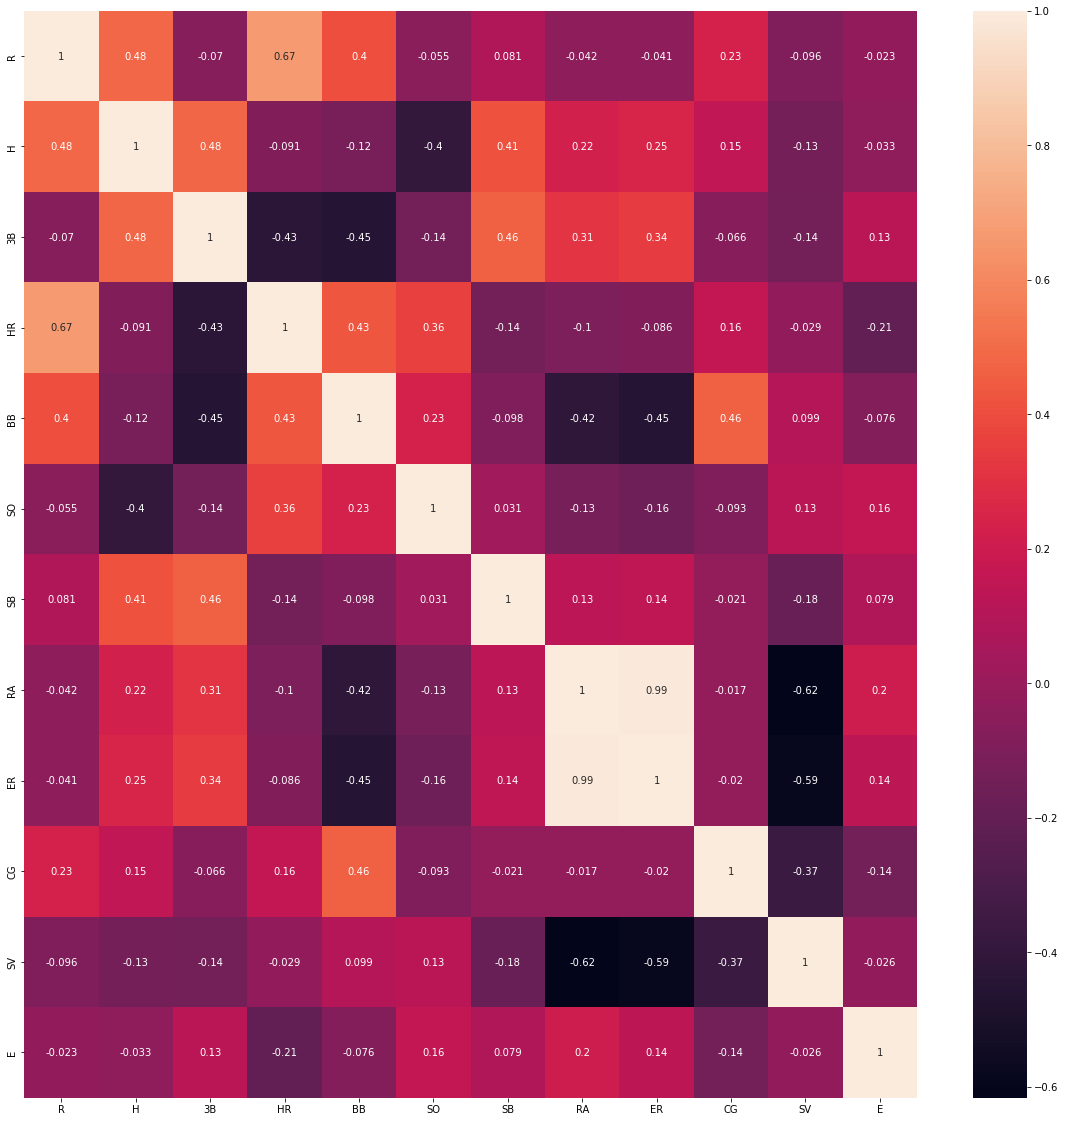

In [91]:
#first chack heatmap
plt.figure(figsize=(20,20),facecolor='white')
sns.heatmap(feature.corr(),annot=True)
plt.show()


1. ER(Earned Runs) and RA(Runs Allowed) is highly co-related with each other.
2. Now chacking ER and RA is importent for target.

In [92]:
#chacking features vs target
baseball_data.corrwith(baseball_data.W).sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
dtype: float64

Clearly seeing that ER(Earned Runs) is more importent then RA(Runs Allowed). so we have do drop RA.

In [93]:
#drop RA
feature = feature.drop(columns=['RA'])

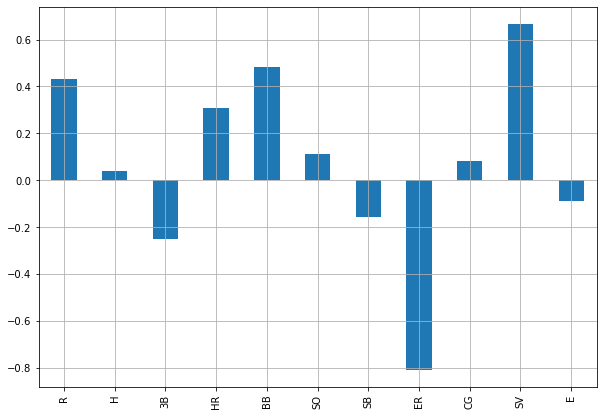

In [94]:
#bar plot for chack correlation 
feature.corrwith(target).plot(kind='bar',grid=True,figsize=(10,7))
plt.show()

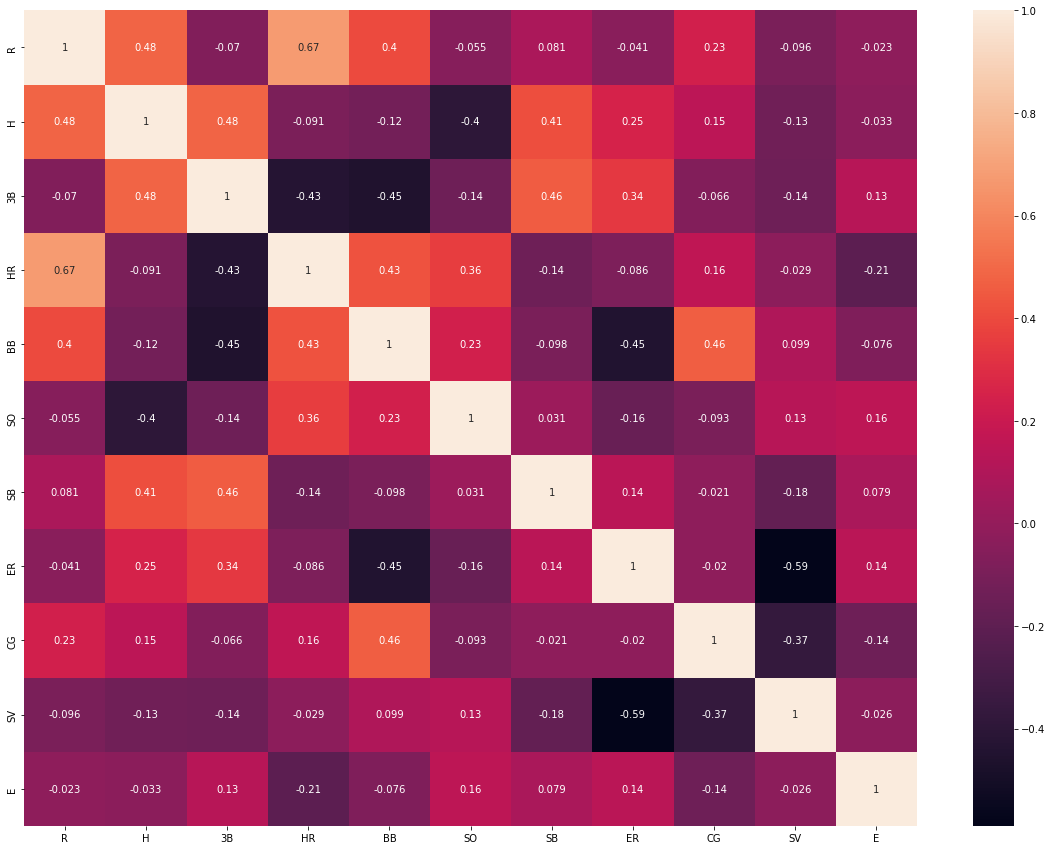

In [95]:
#again chaking by heatmap
plt.figure(figsize=(20,15),facecolor='white')
sns.heatmap(feature.corr(),annot=True)
plt.show()

# Outliers and skewness.

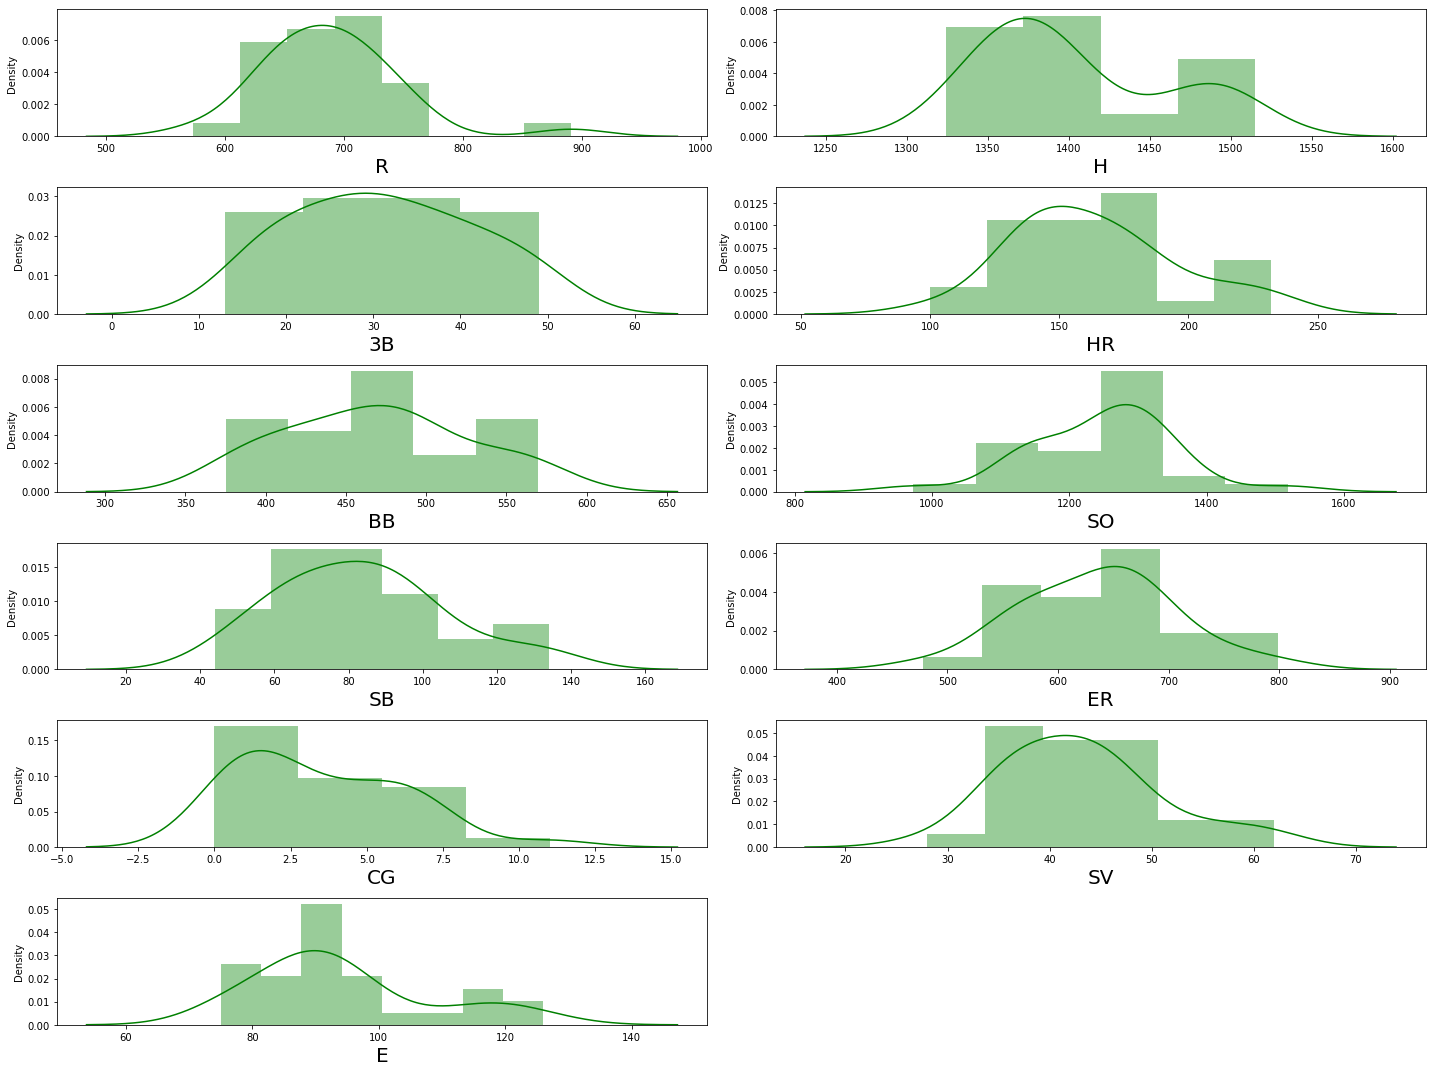

In [96]:
#Distribution plot to chack outlier
plt.figure(figsize=(20,15),facecolor='white',edgecolor='blue',)
plot = 1
for column in feature:
    if plot<=12:
        plt.subplot(6,2,plot)
        sns.distplot(feature[column],color='green',)
        plt.xlabel(column,fontsize=20)
    plot+=1
plt.tight_layout()


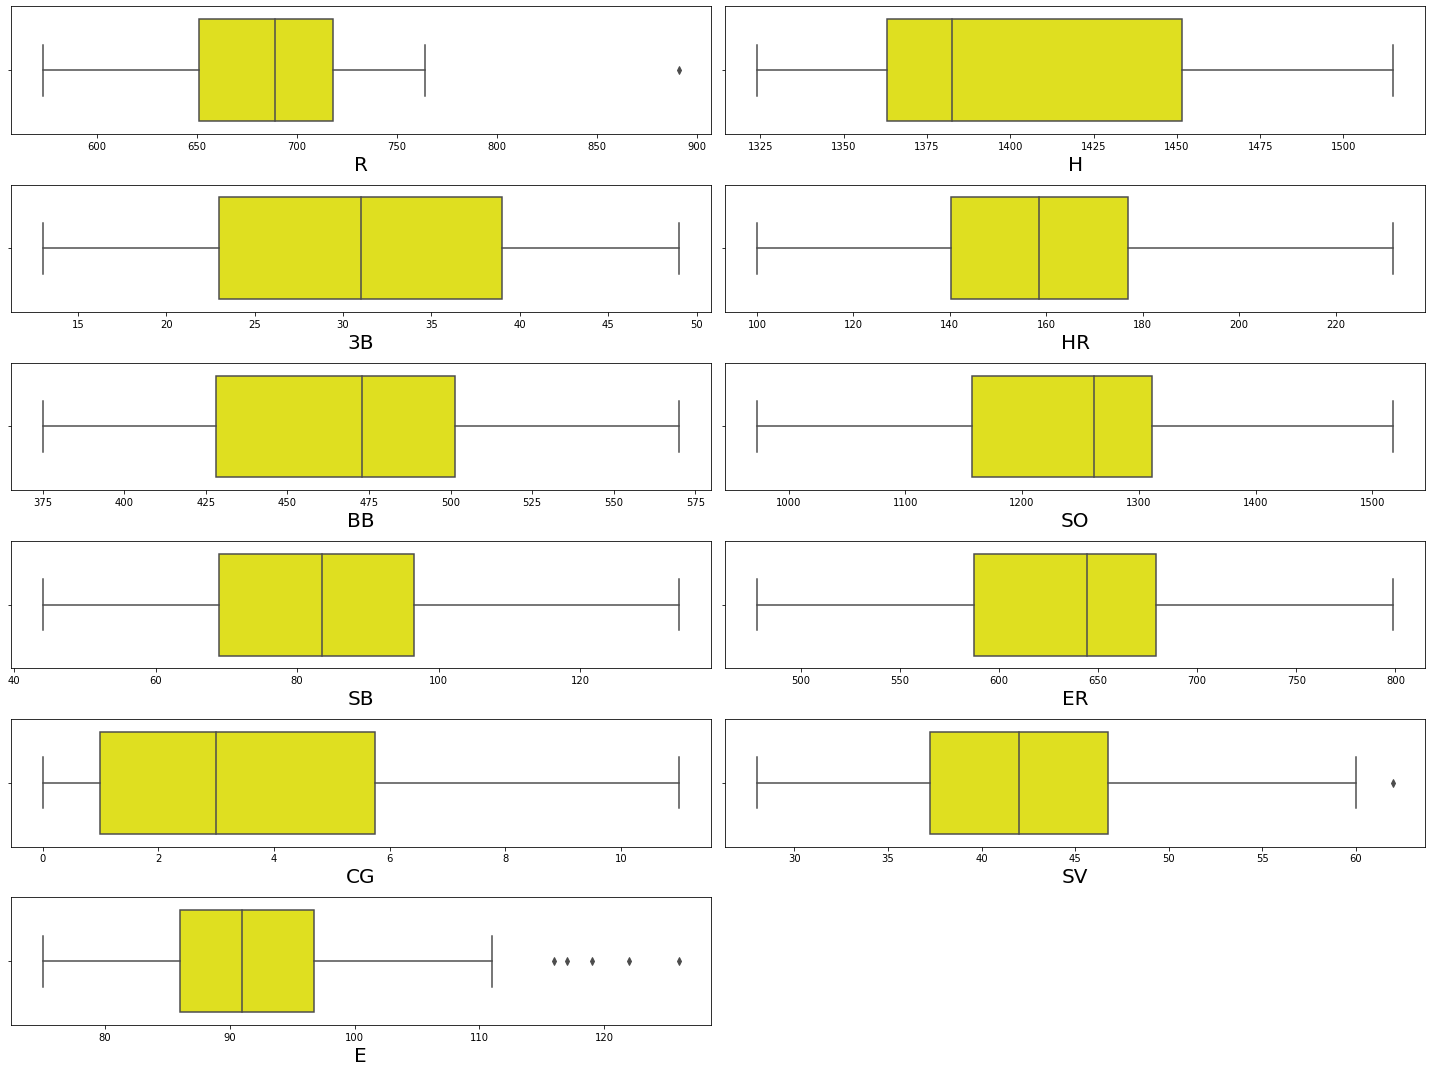

In [97]:
#using box plot
plt.figure(figsize=(20,15),facecolor='white')
plot = 1
for column in feature:
    if plot<=12:
        plt.subplot(6,2,plot)
        sns.boxplot(feature[column],color='yellow')
        plt.xlabel(column,fontsize=20)
    plot+=1
plt.tight_layout()

1. Only R,E and sv have outlier.
2. i am using IQR method for remove outlier.

In [98]:
q1 = feature.quantile(0.25) # 25% of data
q3 = feature.quantile(0.75) # 75% of data
iqr = q3-q1 #IQR = Inter quantile range

In [99]:
#now iqr for R column
high = q3.R + (iqr.R*1.50)
print(high)
index = np.where(feature['R']>high)
print(index)
feature = feature.drop(feature.index[index])
target = target.drop(target.index[index])
feature.reset_index()

818.75
(array([5], dtype=int64),)


,index,R,H,3B,HR,BB,SO,SB,ER,CG,SV,E
0,0,724,1497,42,139,383,973,104,601,2,56,88
1,1,696,1349,44,156,439,1264,70,653,2,45,86
2,2,669,1395,29,141,533,1157,86,584,11,38,79
3,3,622,1381,27,136,404,1231,68,643,7,37,101
4,4,689,1515,49,151,455,1259,83,746,7,35,86
5,6,764,1397,19,212,554,1227,63,652,3,48,93
6,7,713,1370,20,217,418,1331,44,646,0,43,77
7,8,644,1383,32,167,436,1310,87,604,1,60,95
8,9,748,1495,33,161,478,1148,71,694,3,40,97
9,10,751,1419,32,172,503,1233,101,680,5,45,119


In [100]:
#now for sv
high = q3.SV + (iqr.SV*1.50)
print(high)
index = np.where(feature['SV']>high)
print(index)
feature = feature.drop(feature.index[index])
target = target.drop(target.index[index])
feature.reset_index()

61.0
(array([14], dtype=int64),)


,index,R,H,3B,HR,BB,SO,SB,ER,CG,SV,E
0,0,724,1497,42,139,383,973,104,601,2,56,88
1,1,696,1349,44,156,439,1264,70,653,2,45,86
2,2,669,1395,29,141,533,1157,86,584,11,38,79
3,3,622,1381,27,136,404,1231,68,643,7,37,101
4,4,689,1515,49,151,455,1259,83,746,7,35,86
5,6,764,1397,19,212,554,1227,63,652,3,48,93
6,7,713,1370,20,217,418,1331,44,646,0,43,77
7,8,644,1383,32,167,436,1310,87,604,1,60,95
8,9,748,1495,33,161,478,1148,71,694,3,40,97
9,10,751,1419,32,172,503,1233,101,680,5,45,119


In [101]:
#Now for E
high = q3.E + (iqr.E*1.50)
print(high)
index = np.where(feature['E']>high)
print(index)
feature = feature.drop(feature.index[index])
target = target.drop(target.index[index])
feature.reset_index()

112.875
(array([ 9, 13, 14, 16, 22], dtype=int64),)


,index,R,H,3B,HR,BB,SO,SB,ER,CG,SV,E
0,0,724,1497,42,139,383,973,104,601,2,56,88
1,1,696,1349,44,156,439,1264,70,653,2,45,86
2,2,669,1395,29,141,533,1157,86,584,11,38,79
3,3,622,1381,27,136,404,1231,68,643,7,37,101
4,4,689,1515,49,151,455,1259,83,746,7,35,86
5,6,764,1397,19,212,554,1227,63,652,3,48,93
6,7,713,1370,20,217,418,1331,44,646,0,43,77
7,8,644,1383,32,167,436,1310,87,604,1,60,95
8,9,748,1495,33,161,478,1148,71,694,3,40,97
9,11,729,1363,26,230,486,1392,121,572,5,39,85


In [102]:
print("After removing outlier shape of data is : \n",feature.shape)

After removing outlier shape of data is : 
 (23, 11)


In [103]:
#some skewness is present in this data set
feature.skew().sort_values(ascending=False)

SV    0.882291
CG    0.810574
H     0.781281
ER    0.645929
SB    0.568938
E     0.418561
3B    0.290138
BB    0.188649
HR    0.147748
SO   -0.169871
R    -0.373560
dtype: float64

In [104]:
# Skewness removing technique

for index in feature.skew().index:
    if feature.skew().loc[index]>0.5:
        feature[index] = np.sqrt(feature[index])
    if feature.skew().loc[index]<-0.5:
        feature[index] = np.cbrt(feature[index])

In [105]:
feature.skew().sort_values(ascending=False)

H     0.763726
SV    0.692600
ER    0.517313
E     0.418561
SB    0.299381
3B    0.290138
BB    0.188649
HR    0.147748
SO   -0.169871
CG   -0.357958
R    -0.373560
dtype: float64

In [106]:
for index in feature.skew().index:
    if feature.skew().loc[index]>0.5:
        feature[index] = np.sqrt(feature[index])
    if feature.skew().loc[index]<-0.5:
        feature[index] = np.cbrt(feature[index])
feature.skew().sort_values(ascending=False)

H     0.754818
SV    0.600591
ER    0.454887
E     0.418561
SB    0.299381
3B    0.290138
BB    0.188649
HR    0.147748
SO   -0.169871
CG   -0.357958
R    -0.373560
dtype: float64

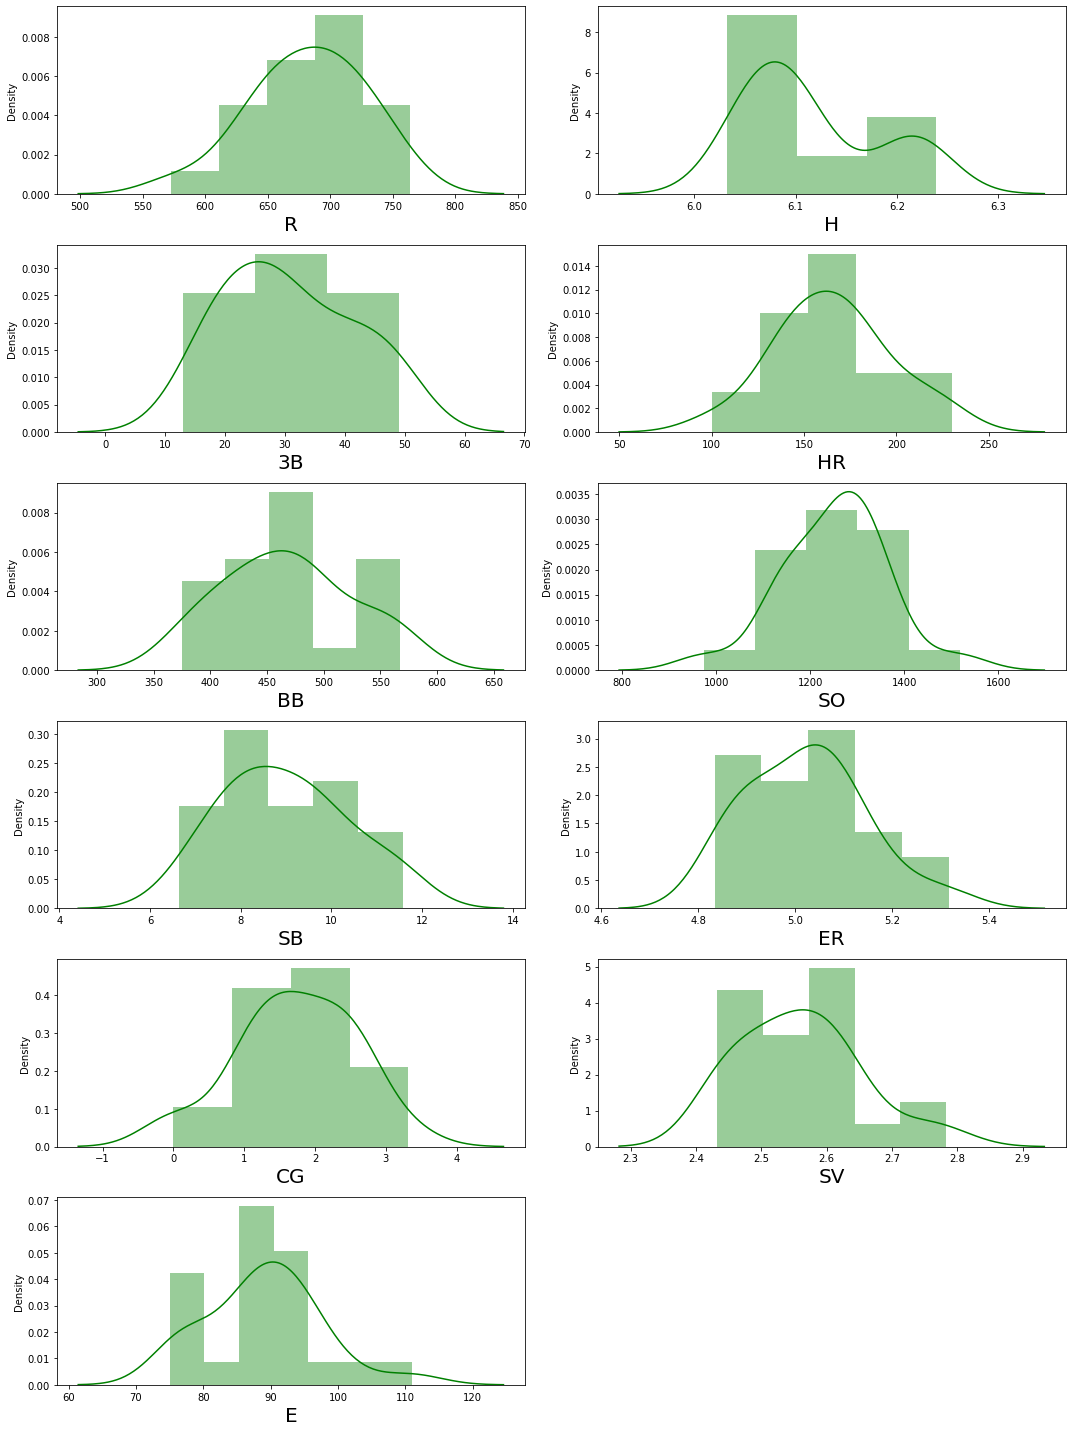

In [107]:
plt.figure(figsize=(15,20),facecolor='white',edgecolor='blue',)
plot = 1
for column in feature:
    if plot<=12:
        plt.subplot(6,2,plot)
        sns.distplot(feature[column],color='green',)
        plt.xlabel(column,fontsize=20)
    plot+=1
plt.tight_layout()


Data looks Good now . looks like normally distributed

In [110]:
print("Now Shape of Featurendata is :\n",feature.shape)
print("Now shape of Target data is :\n",target.shape)

Now Shape of Featurendata is :
 (23, 11)
Now shape of Target data is :
 (23,)


# VIF 

For chacking vif . data should be scaled. for this use StanderdScaler

In [112]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
feature_scaled = ss.fit_transform(feature)

In [114]:
# Let's check the VIF Score first..

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Score"] = [variance_inflation_factor(feature_scaled,i) for i in range(feature_scaled.shape[1])]
vif["Features"] = feature.columns
                    
vif.head(11)

,VIF Score,Features
0,7.047590,R
1,4.551204,H
2,6.915930,3B
3,8.228948,HR
4,3.812274,BB
5,4.791342,SO
6,2.587229,SB
7,3.631611,ER
8,2.506854,CG
9,2.738105,SV


There is no problem becasue the VIF scores of all the features are less than 10.

# Modal building

1. First chack best random states

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score

In [166]:
#chacking best random states
def Modal_prediction(algo):
    best_state =0
    max_r2score =0
    for i in range(1,201):
        x_train,x_test,y_train,y_test = train_test_split(feature_scaled,target,random_state=i,test_size=0.25)
        algo.fit(x_train,y_train)
        y_pre = algo.predict(x_test)
        score = r2_score(y_test,y_pre)
        if score > max_r2score:
            max_r2score=score
            best_state = i
    print("Best Score : \n",max_r2score)
    print("Best Random State :\n ",best_state)
    print("Mean absolute error is :\n",mean_absolute_error(y_test,y_pre))
    print("Mean squared error is :\n ",mean_squared_error(y_test,y_pre))
    print("Cross value score is :\n ",cross_val_score(algo,feature_scaled,target,cv=5,scoring='r2').mean())

# LinearRegression 

In [169]:
from sklearn.linear_model import LinearRegression
len_reg = LinearRegression()
Modal_prediction(len_reg)

Best Score : 
 0.9866943632678038
Best Random State :
  163
Mean absolute error is :
 5.603180734960728
Mean squared error is :
  46.32914951441993
Cross value score is :
  0.11712887227111321


# DecisionTreeRegressor 

In [171]:
from sklearn.tree import DecisionTreeRegressor
deci_tree_reg = DecisionTreeRegressor()
Modal_prediction(deci_tree_reg)

Best Score : 
 0.795236402417348
Best Random State :
  191
Mean absolute error is :
 4.5
Mean squared error is :
  29.166666666666668
Cross value score is :
  -0.8482570731068672


# RandomForestRegressor

In [172]:
from sklearn.ensemble import RandomForestRegressor
rand_reg = RandomForestRegressor()
Modal_prediction(rand_reg)

Best Score : 
 0.7972163588390501
Best Random State :
  35
Mean absolute error is :
 6.336666666666666
Mean squared error is :
  58.09073333333331
Cross value score is :
  0.10147542659530431


# KNeighborsRegressor

In [173]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
Modal_prediction(knn_reg)

Best Score : 
 0.6724401913875596
Best Random State :
  52
Mean absolute error is :
 7.23333333333333
Mean squared error is :
  82.00666666666665
Cross value score is :
  0.33603493563383235


# BaggingRegressor

In [176]:
from sklearn.ensemble import BaggingRegressor
begg_reg = BaggingRegressor()
Modal_prediction(begg_reg)

Best Score : 
 0.8991605839416058
Best Random State :
  131
Mean absolute error is :
 5.666666666666669
Mean squared error is :
  69.40000000000002
Cross value score is :
  -0.09252376676145757


# AdaBoostRegressor

In [177]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor()
Modal_prediction(ada_reg)

Best Score : 
 0.6885393258426966
Best Random State :
  173
Mean absolute error is :
 5.138888888888888
Mean squared error is :
  38.20833333333334
Cross value score is :
  -0.21741071536782225


# ExtraTreesRegressor

In [178]:
from sklearn.ensemble import ExtraTreesRegressor
extra_tree_reg = ExtraTreesRegressor()
Modal_prediction(extra_tree_reg)

Best Score : 
 0.7890530157121138
Best Random State :
  130
Mean absolute error is :
 5.295000000000002
Mean squared error is :
  51.33818333333337
Cross value score is :
  0.05467015517706055


# GradientBoostingRegressor

In [179]:
from sklearn.ensemble import GradientBoostingRegressor
grand_reg = GradientBoostingRegressor()
Modal_prediction(grand_reg)

Best Score : 
 0.871363898258702
Best Random State :
  145
Mean absolute error is :
 4.403043861728006
Mean squared error is :
  32.83102156837666
Cross value score is :
  -0.4755569770895443


# XGBRegressor

In [180]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
Modal_prediction(xgb_reg)

Best Score : 
 0.8674767305544819
Best Random State :
  175
Mean absolute error is :
 5.971015930175781
Mean squared error is :
  59.359762581589166
Cross value score is :
  0.21284963163434964


# SVR

In [181]:
from sklearn.svm import SVR
svr = SVR()
Modal_prediction(svr)

Best Score : 
 0.21389086655259715
Best Random State :
  48
Mean absolute error is :
 8.275884443982605
Mean squared error is :
  105.84757107326368
Cross value score is :
  -0.10534925674348579


 As we have completed most of importent modal. i found that linear Regression is one of the best modal for this.

# Hyper Perameter Tunning

In [183]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [185]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
pera_meter = {"fit_intercept":[True,False],
              'copy_X':[True,False],
              'positive':[True,False],
               'n_jobs':[1,2,3,4,5]}

In [186]:
gride_serch = GridSearchCV(estimator=lin_reg,param_grid=pera_meter,cv=3,n_jobs=2)

In [187]:
gride_serch.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LinearRegression(), n_jobs=2,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 2, 3, 4, 5], 'positive': [True, False]})

In [200]:
print("best Perameter is :\n",gride_serch.best_params_)

best Perameter is :
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}


In [201]:
#again build modal
lin_reg = LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,positive=False)

In [202]:
Modal_prediction(lin_reg)

Best Score : 
 0.9866943632678038
Best Random State :
  163
Mean absolute error is :
 5.603180734960728
Mean squared error is :
  46.32914951441993
Cross value score is :
  0.11712887227111321


# Final Modal and save

Linear Regression modal gives good score so this is final modal

In [203]:
import joblib
joblib.dump(lin_reg,'BaseBall_Modal.plk')

['BaseBall_Modal.plk']